<a href="https://colab.research.google.com/github/MohammedH1259/DBDS-Final/blob/master/CarsDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Hasham Ali
#Intro To Stats For Business
#5/8/2022
#Extra Credit Project 


In [2]:
#Project Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import hypergeom
import scipy.stats as st
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.linear_model import LinearRegression



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Data Loading 
cars_df = pd.read_csv('cars.csv', sep = ';')
print(cars_df.head())

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0       165.0   
2         Plymouth Satellite  18.0          8         318.0       150.0   
3              AMC Rebel SST  16.0          8         304.0       150.0   
4                Ford Torino  17.0          8         302.0       140.0   

   Weight  Acceleration  Model Origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3  3433.0          12.0     70     US  
4  3449.0          10.5     70     US  


In [4]:
#Data Cleaning (if necessry)
print(cars_df.info())
print(cars_df['MPG'].describe())
#Data Cleaning Not Necessary All Values Are Loaded 
#There is a 0 value for MPG, might be best to remove 
cars_df = cars_df[cars_df['MPG']>0]
print(cars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           406 non-null    float64
 2   Cylinders     406 non-null    int64  
 3   Displacement  406 non-null    float64
 4   Horsepower    406 non-null    float64
 5   Weight        406 non-null    float64
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    int64  
 8   Origin        406 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.7+ KB
None
count    406.000000
mean      23.051232
std        8.401777
min        0.000000
25%       17.000000
50%       22.350000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        ---

Chapter 2 - One Variable Analysis for Miles Per Gallon

*   Relative Frequency
*   Mean
*   Standard Deviation
*   Range
*   Interquartile Range
*   Lower and Upper Limit Values
*   Box Plot
*   Pie Chart









In [5]:
#Mean 
mean_MPG = cars_df['MPG'].mean()
print('Mean MPG: '+ str(mean_MPG))

Mean MPG: 23.514572864321615


In [6]:
#Median 
median_MPG = cars_df['MPG'].median()
print('Median MPG: '+ str(median_MPG))

Median MPG: 23.0


In [7]:
#Standard Deviation 
standard_deviation_MPG = cars_df['MPG'].std()
print('Standard Devation of MPG: '+ str(standard_deviation_MPG))

Standard Devation of MPG: 7.815984312565782


In [8]:
#Range
max_MPG = cars_df['MPG'].max()
min_MPG = cars_df['MPG'].min()
print('Max: '+ str(max_MPG))
print('Min: '+ str(min_MPG))
print('Range: '+ str(max_MPG-min_MPG))

Max: 46.6
Min: 9.0
Range: 37.6


In [9]:
#Interquartile Range 
q3, q1 = np.percentile(np.array(cars_df['MPG']),[75,25])
iqr_MPG = q3 - q1
print('Q1: '+str(q1))
print('Q3:' +str(q3))
print('IQR: '+ str(iqr_MPG))

Q1: 17.5
Q3:29.0
IQR: 11.5


13.0    0.050251
14.0    0.047739
18.0    0.042714
15.0    0.040201
26.0    0.035176
          ...   
31.9    0.002513
16.9    0.002513
18.2    0.002513
22.3    0.002513
44.0    0.002513
Name: MPG, Length: 129, dtype: float64


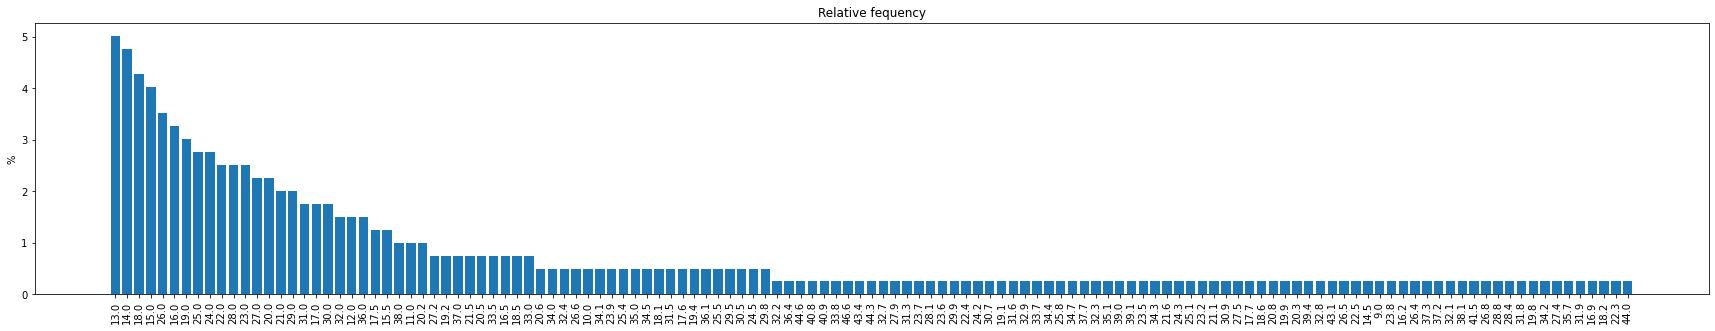

In [10]:
#Relative Frequency 
relative_frequency_MPG = cars_df['MPG'].value_counts(normalize = True)
print(relative_frequency_MPG)

series = cars_df['MPG'].value_counts() / len(cars_df)
index = range(len(relative_frequency_MPG))
plt.figure(figsize = [30,5])
plt.bar(index, series*100)
plt.ylabel('%')
plt.title('Relative fequency')
plt.xticks(index, series.index, rotation = 90);


In [11]:
#Lower and Upper Limit Values 
lower_bound_MPG = q1-iqr_MPG*1.5
upper_bound_MPG = q3+iqr_MPG*1.5
print('Lower Bound: ' + str(lower_bound_MPG))
print('Upper Bound: '+ str(upper_bound_MPG))

Lower Bound: 0.25
Upper Bound: 46.25


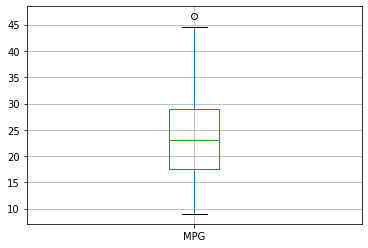

In [12]:
#Box Plot
boxplot = cars_df.boxplot(column = ['MPG'])

US        249
Japan      79
Europe     70
Name: Origin, dtype: int64


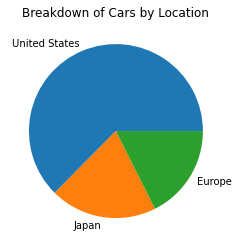

In [13]:
#Pie Chart
print(cars_df['Origin'].value_counts())

series = [249, 79, 70]
mylabels = ['United States','Japan','Europe']
plt.title('Breakdown of Cars by Location')
plt.pie(series, labels = mylabels);
plt.show()

Chater 3 - Probability Analysis 



*   Complement Rule
*   Addition Rule



In [14]:
#Addition Rule
#P(A or B) = P(A) + P(B) - P(A and B)
#Event A - Probability of picking car with MPG < 20 
#Event B - Probability of Picking car with MPG > 25 
#Mutually Exclusive Event so P(A and B) = 0 


(cars_df['MPG']<20).value_counts();
#True = 151
#False 247
pA = 151/len(cars_df)

(cars_df['MPG']>25).value_counts();
#True = 158
#False = 240
pB = 158/len(cars_df)

pAorB = pA + pB

print('Probability of Event A :'+str(pA))
print('Probability of Event B :'+str(pB))
print('Probability of Event A or B :'+str(pAorB))

Probability of Event A :0.3793969849246231
Probability of Event B :0.3969849246231156
Probability of Event A or B :0.7763819095477387


In [15]:
#Complement Rule 
#P(A) + P(A') = 1 
#Event A - picking a car that has an MPG of > 28

(cars_df['MPG']>25).value_counts()

pA = 158/len(cars_df)
pNotA = 240/len(cars_df)

print('Probability of A: '+ str(pA))
print('Probability of Not A: '+ str(pNotA))
print('Probability of A and Not A :'+ str(pA + pNotA))




Probability of A: 0.3969849246231156
Probability of Not A: 0.6030150753768844
Probability of A and Not A :1.0


Chapter 4 


*   Bionmial Distribution
*   Hypergeometric Distribution


Probability: 0.4798994974874372
0	0.0014483473659296052
1	0.013363978110751448
2	0.055489561285946176
3	0.13653470152161973
4	0.22046726562126276
5	0.24411158106470254
6	0.18770254421641783
7	0.09896807714378417
8	0.0342443890117079
9	0.007021662159137107
10	0.0006478924987416359


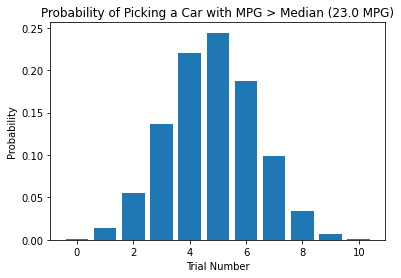

In [16]:
#Binomial Distribution - 
#probability of picking a car that has MPG > Median (23 MPG)
cars_gtM = cars_df['MPG']>median_MPG


#There are 191 cars in our dataset that have a MPG greater than median 
probability_gtM = 191/len(cars_df)
print('Probability: '+str(probability_gtM))


#number of Trials: n = 10; trial is independent - You can pick a car and put it back 
#so probability is conserved
n = 10 
r_values = list(range(n+1))
mean,var = binom.stats(n, probability_gtM)
distribution = [binom.pmf(r,n,probability_gtM) for r in r_values]
#Printing Distribution Table
for i in range(n + 1):
    print(str(r_values[i]) + "\t" + str(distribution[i]))

#Printing Bar Graph
plt.bar(r_values, distribution)
plt.ylabel('Probability')
plt.title('Probability of Picking a Car with MPG > Median (23.0 MPG)')
plt.xlabel('Trial Number')
plt.show()


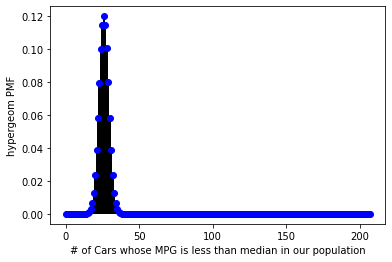

In [17]:
#Hypergeometric Distribution 

#Collection of Cars - Got this Value from counting how many rows of cars we have
M = 398

#Collection of Cars whose value is less than MPG 398-191 where 191 number of cars MPG greater than median
n = 398-191

#Number of Trials - 50 
N = 50 

#Calculation
rv= hypergeom(M,n,N)
x= np.arange(0,n+1)
pmf_cars_lessthanMedian = rv.pmf(x)


#Figure Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_cars_lessthanMedian, 'bo')
ax.vlines(x, 0, pmf_cars_lessthanMedian, lw=2)
ax.set_xlabel('# of Cars whose MPG is less than median in our population')
ax.set_ylabel('hypergeom PMF')
plt.show()


Chapter 5


*   Sampling Distribution based on Mean
*   Sampling Distribution based on sample proportion



[22.857142857142858, 21.494285714285713, 22.63714285714286, 22.751428571428573, 22.982857142857146, 22.488571428571426, 23.99142857142857, 23.997142857142858, 23.954285714285714, 22.445714285714285, 23.494285714285713, 26.502857142857142, 26.000000000000004, 22.537142857142857, 21.482857142857142, 21.654285714285717, 21.037142857142857, 22.568571428571428, 21.965714285714284, 21.914285714285715, 22.665714285714287, 24.917142857142853, 25.062857142857144, 25.422857142857143, 21.988571428571426, 21.720000000000002, 23.98857142857143, 24.625714285714288, 24.705714285714286, 22.854285714285712, 25.75142857142857, 23.21142857142857, 22.40857142857143, 24.028571428571432, 23.662857142857142, 23.00857142857143, 22.079999999999995, 24.751428571428573, 24.091428571428573, 20.754285714285718, 24.68, 22.740000000000002, 22.728571428571428, 23.211428571428566, 23.425714285714285, 23.234285714285715, 23.300000000000004, 25.74, 23.494285714285713, 23.60571428571429, 22.534285714285712, 24.4285714285

Text(0, 0.5, 'Density')

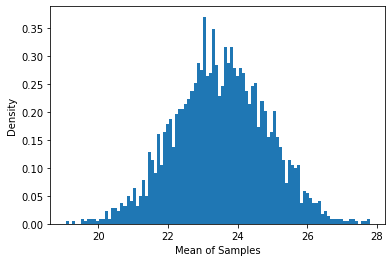

In [18]:
#Sampling Distribution Based on Mean


sample_size = 35
sample_mean = []

for _ in range(2500):
      cars_sample = cars_df['MPG'].sample(frac = sample_size/len(cars_df), replace = True)
      sample_mean.append(np.mean(cars_sample))

#Print
print(sample_mean)
print(f"Mean: {np.mean(sample_mean)} \n")

plt.hist(sample_mean, bins = 100, density = True)
plt.xlabel('Mean of Samples')
plt.ylabel('Density')




In [19]:
#Sampling Distribution based on Sampling Proportion


Chapter 6 


1.   Calculate Population Mean, Confidence Interval Sigma Known or Unknown
2.   Apply Normal Z-Statistic



In [20]:
#Calculate Population Mean 
pop_Mean = cars_df['MPG'].mean()
print('Population Mean: '+ str(pop_Mean))

#Calculate Confidence Interval
#Using Normal Distribution Due to High Sample Size 
#95% Confidence Interval 

st.norm.interval(alpha =.95, loc=np.mean(cars_df['MPG']), scale = st.sem(cars_df['MPG']))

#95% chance population mean is found between 22.746 and 24.28

Population Mean: 23.514572864321615


(22.74669838467898, 24.28244734396425)

In [21]:
#Apply Normal Z-statistic

z_scoresMPG = st.zscore(cars_df['MPG'])
cars_zscore_df = pd.DataFrame(cars_df['MPG'])
cars_zscore_df['Z-Scores'] = st.zscore(cars_df['MPG']);

#Printing first 5 values, but all values available in data frame
print(cars_zscore_df.head())


    MPG  Z-Scores
0  18.0 -0.706439
1  15.0 -1.090751
2  18.0 -0.706439
3  16.0 -0.962647
4  17.0 -0.834543


Chapter 7 


*   Formulate Hypothesis Test 
*   Apply Hypothesis Test either using Normal z Statistic or Student's t-Statistic



In [22]:
#Hypothesis Test 

#Assumptions 
#Normal Distribution of Population

#Null Hypothesis 
#Cars with 8 cylinders do not have a lower MPG than population Mean
# 8cyl Mean = Population Mena

#Alternate Hypothesis 
#Cars with 8 cylinders do have a lower MPG than population mean 
#8cyl Mean < Population Mean


#Creating Sample
cars_8cyl_df = cars_df.loc[cars_df['Cylinders'] == 8]

#Values for zTest 
alpha = .05
populationMean = cars_df['MPG'].mean()
populationStd = cars_df['MPG'].std()

zTestScore, pValue = ztest(cars_8cyl_df['MPG'], value = populationMean, alternative = 'smaller')

print('Z statistic: '+str(zTestScore))
print('P Value: '+ str(pValue))
print('As P Value is less than .05, we can reject our null hypothesis')


Z statistic: -30.599156011100465
P Value: 6.280054840749652e-206
As P Value is less than .05, we can reject our null hypothesis


Chapter 8 



*   Compute Standard Deviation, and Confidence Interval for two Data Sets
*   Calculate the Paired Difference Confidence Interval





In [23]:
#Calculating STD DEviation and Confidence Intervals 

cars_df1 = cars_df['MPG'].loc[2:41:2]
cars_df2 = cars_df['MPG'].loc[1:40:2]


#Std and Confidence Intervals of Dataset 1 
print('Standard Deviation: '+ str(cars_df1.std()))
print('Confidence Intervals: '+ str(st.norm.interval(alpha =.95, loc=np.mean(cars_df1), scale = st.sem(cars_df1))))

#Std and Confidence Intervals of Dataset 2
print('Standard Deviation: '+ str(cars_df1.std()))
print('Confidence Intervals: '+ str(st.norm.interval(alpha =.95, loc=np.mean(cars_df2), scale = st.sem(cars_df2))))


Standard Deviation: 5.914836778614188
Confidence Intervals: (16.070669682690934, 21.69403619966201)
Standard Deviation: 5.914836778614188
Confidence Intervals: (15.791444280721189, 21.149732189867045)


In [24]:
#Calculating the Paired Difference Confidence Interval 

alpha = .05
diff_samples = np.array(cars_df1) - np.array(cars_df2)
n= len(cars_df1)
diff_mean = np.mean(diff_samples)
diff_variance = np.var(diff_samples, ddof=1)
critical_val = st.t.ppf(q = 1-alpha/2, df = n - 1)
radius = critical_val*np.sqrt(diff_variance)/np.sqrt(n)


print('Paired Confidence Interval:')
( diff_mean - radius, diff_mean + radius )





Paired Confidence Interval:


(-1.4156374181077176, 2.239166829872423)

Chapter 11 


*   Regression Equation
*   Correlation 
*   Coefficent of Determination






Correlation: -0.7542761981708772
coefficient of determination: 0.5689325831271121
intercept: 38.57819499120956
slope: [-0.14639875]


0.5689325831271121

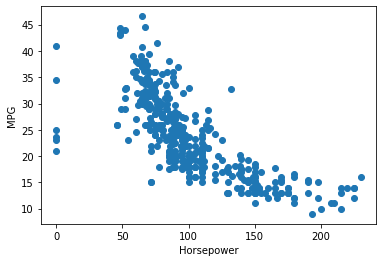

In [25]:
# We are looking at regression between MPG and Horsepower 
x = np.array(cars_df['Horsepower']).reshape(-1,1)
y = np.array(cars_df['MPG'])

#Correlation 
correlation = np.corrcoef(np.array(cars_df['Horsepower']),np.array(cars_df['MPG']))
print('Correlation: '+str(correlation[0][1]))


plt.scatter(x,y)
plt.xlabel('Horsepower')
plt.ylabel('MPG')

model = LinearRegression()
model.fit(x,y)
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

#Regression Equation 
# Y = -.14639875x + 38.57819499120596
# Rsqared 
.5689325831271121
#Correlation